In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [65]:

# this is a function which calculates Euclidian distance between two points
def dist(x1, y1, x2, y2):
    dist = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    return dist

# find coordinates in an original coordinate system which correspond to those in a new coordinate systems (Backward mapping)
def getOriginCoord(X, Y, incir, outcir):
    '''
    X,Y: coordinate in a new coordinate system
    incir: tuple storing 3 values for inner boundary; x coordinate of center, y coordinate of center, and radius
    outcir: tuple storing 3 values for outer boundary; x coordinate of center, y coordinate of center, and radius
    M,N: the width and height of unwraped image, according to Lima's thesis 
    '''
    M = 64
    N = 512
    xi, yi, ri = incir # (xi, yi) is the center of inner circle; r is radius
    xo, yo, ro = outcir # (xo, yo) is the center of outer circle; r is radius
    
    # these are due to the equations in the Lima's thesis
    # in a clockwise order
    th = 2 * np.pi * X / N
    x = (xi + ri * np.cos(th)) + (ro * np.cos(th) - ri * np.cos(th)) * Y / M
    y = (yi + ri * np.sin(th)) + (ro * np.sin(th) - ri * np.sin(th)) * Y / M

    # round x and y so that they are regarded as coordinates in the original image
    x = np.uint16(np.round(x))
    y = np.uint16(np.round(y))

    return (x, y)

# return unwrapped image
def getUnwrap(image, incir, outcir):
    '''
    image: original image
    incir, outcir: these inputs are the same with getOriginalCoord()
    '''

    M = 64
    N = 512

    unwrapImage = np.zeros((M, N))

    # project coordinates one by one
    for Y in range(M):
        for X in range(N):
            x, y = getOriginCoord(X, Y, incir, outcir)

            newImage[Y][X] = image[y][x]
    
    return unwrapImage




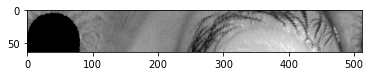

In [69]:
path = 'CASIA Iris Image Database (version 1.0)/001/1'
image_file = os.path.join(path, '001_1_2.bmp')
image = cv2.imread(image_file)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

innercircle = (100, 100, 40)
outercircle = (100, 100, 80)

#x, y = getOriginCoord(1, 1, innercircle, outercircle)
#type(x)
newImg = getUnwrap(img_gray, innercircle, outercircle)
newImg
plt.imshow(newImg, cmap='gray')